# 🔍 Job Market Analysis and Salary Prediction in India using AI/ML

**Objective**:  
Analyze job postings in India to discover trends and use machine learning to:
- Predict the job category (e.g., IT, HR, Marketing, etc.)
- Predict whether a job is high-paying or low-paying

**Dataset**: Indian Job Postings Dataset (synthetically created)


## **🧹 1. Load & Explore Data**

In [1]:
from google.colab import files
uploaded = files.upload()

Saving indian_job_postings_big.csv to indian_job_postings_big.csv


In [2]:
import pandas as pd
df = pd.read_csv("indian_job_postings_big.csv")
df.head()

,job_title,company,location,skills_required,job_category,experience_required,salary_range
0,HR Manager,Cognizant,Ahmedabad,"Payroll, Recruitment",HR,5+ years,3-5 LPA
1,Software Engineer,Google,Noida,"Spring, SQL, Kubernetes",Software,0-1 years,3-5 LPA
2,Frontend Developer,Capgemini,Kolkata,"JavaScript, Angular, HTML",Software,2-4 years,6-9 LPA
3,Digital Marketing Executive,Deloitte,Jaipur,"SEM, Google Ads",Marketing,1-2 years,2-4 LPA
4,Product Manager,Amazon,Noida,"Roadmap, Scrum, Agile, Stakeholder Management",Management,0-1 years,4-6 LPA


## **📊 2. Exploratory Data Analysis (EDA)**
* This step helps us understand the **data**, **find patterns** and **prepare it for machine learning**.

In [3]:
df.columns

Index(['job_title', 'company', 'location', 'skills_required', 'job_category',
       'experience_required', 'salary_range'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_title            100 non-null    object
 1   company              100 non-null    object
 2   location             100 non-null    object
 3   skills_required      100 non-null    object
 4   job_category         100 non-null    object
 5   experience_required  100 non-null    object
 6   salary_range         100 non-null    object
dtypes: object(7)
memory usage: 5.6+ KB


In [5]:
df.describe(include='all')

,job_title,company,location,skills_required,job_category,experience_required,salary_range
count,100,100,100,100,100,100,100
unique,15,15,14,100,9,5,8
top,Frontend Developer,Google,Gurgaon,"Payroll, Recruitment",Software,5+ years,10-15 LPA
freq,10,12,11,1,27,25,16


In [6]:
df.isnull().sum()

,0
job_title,0
company,0
location,0
skills_required,0
job_category,0
experience_required,0
salary_range,0


### **Number of Job Postings per Category**
* This tells us which job domain has the **most openings**.



In [7]:
df['job_category'].value_counts()

,count
job_category,
Software,27
Marketing,15
Cloud,14
Data,10
Design,8
AI/ML,8
HR,7
Sales,7
Management,4


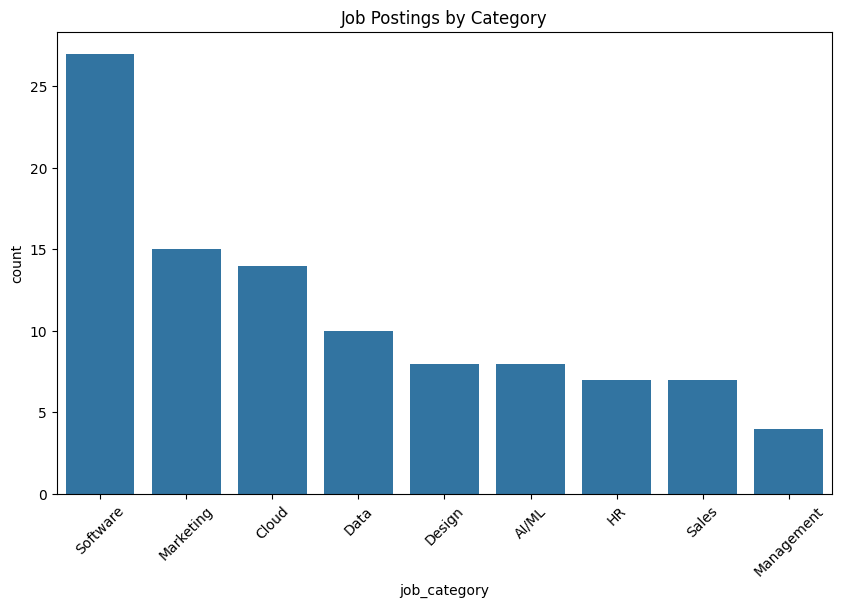

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='job_category', order=df['job_category'].value_counts().index)
plt.title("Job Postings by Category")
plt.xticks(rotation=45)
plt.show()

### **Most Common Job Titles**


In [9]:
df['job_title'].value_counts().head(10)

,count
job_title,
Frontend Developer,10
Digital Marketing Executive,8
Data Analyst,8
Machine Learning Engineer,8
Graphic Designer,8
Backend Developer,8
HR Manager,7
Content Writer,7
DevOps Engineer,7


/tmp/ipython-input-10-4089079342.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df, x='job_title', order=top_titles, palette="mako")


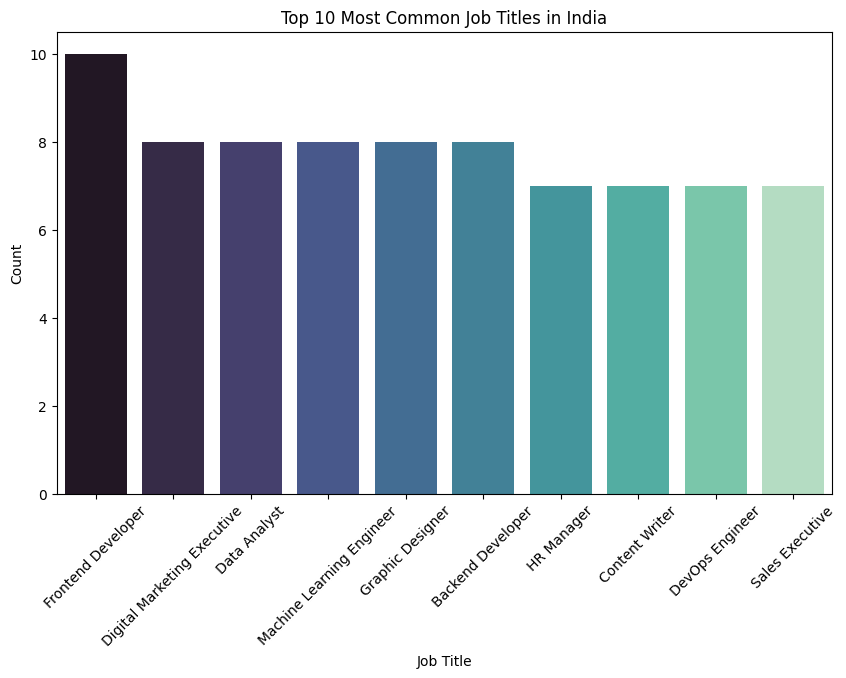

In [10]:
top_titles = df['job_title'].value_counts().head(10).index

# Filter dataset for only those titles
filtered_df = df[df['job_title'].isin(top_titles)]

# Now plot
plt.figure(figsize=(10,6))
sns.countplot(data=filtered_df, x='job_title', order=top_titles, palette="mako")
plt.title("Top 10 Most Common Job Titles in India")
plt.xticks(rotation=45)
plt.xlabel("Job Title")
plt.ylabel("Count")
plt.show()

### **Top Cities for Job Postings**

In [11]:
df['location'].value_counts().head(10)

,count
location,
Gurgaon,11
Chandigarh,10
Noida,8
Pune,8
Bhubaneswar,8
Ahmedabad,8
Chennai,7
Bangalore,7
Kolkata,7


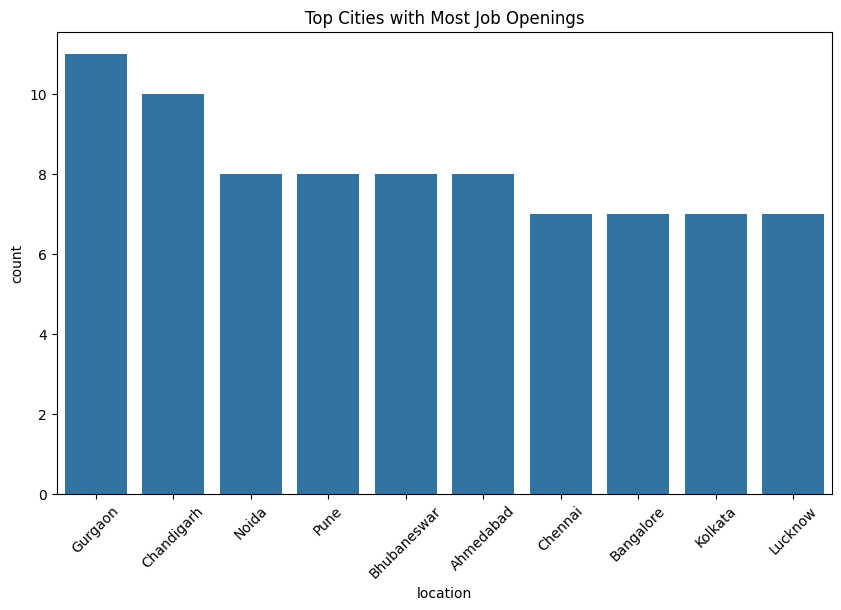

In [12]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='location', order=df['location'].value_counts().head(10).index)
plt.title("Top Cities with Most Job Openings")
plt.xticks(rotation=45)
plt.show()

### **Most Frequent Salary Ranges**

In [13]:
df['salary_range'].value_counts()

,count
salary_range,
10-15 LPA,16
3-5 LPA,15
8-12 LPA,15
2-4 LPA,13
7-10 LPA,11
5-8 LPA,11
6-9 LPA,10
4-6 LPA,9


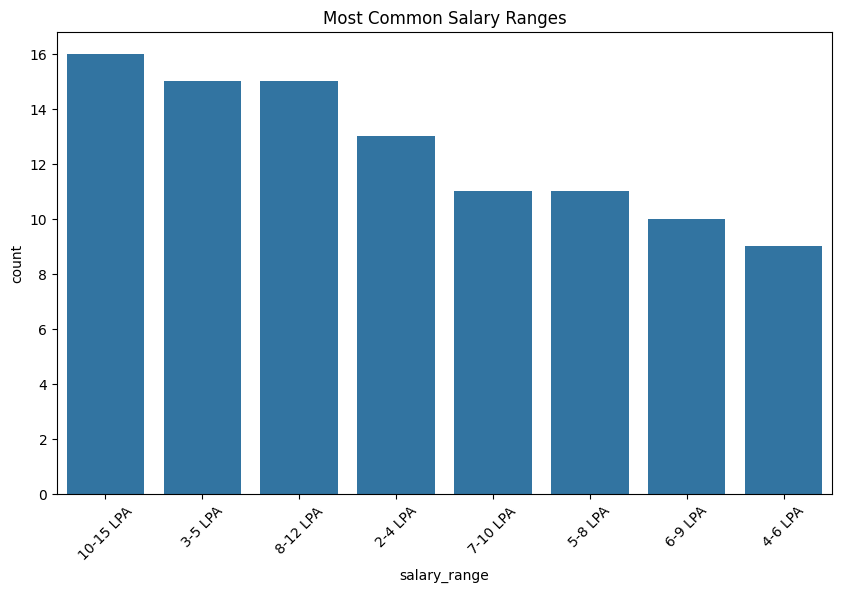

In [14]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='salary_range', order=df['salary_range'].value_counts().index)
plt.title("Most Common Salary Ranges")
plt.xticks(rotation=45)
plt.show()

 ### **Most Common Skills**

In [15]:
from collections import Counter

all_skills = ', '.join(df['skills_required']).split(', ')
skill_counts = Counter(all_skills)
skill_counts.most_common(10)

[('Python', 19),
 ('AWS', 11),
 ('Kubernetes', 10),
 ('Docker', 10),
 ('SEO', 10),
 ('Communication', 9),
 ('SQL', 8),
 ('Angular', 7),
 ('HTML', 7),
 ('SEM', 7)]

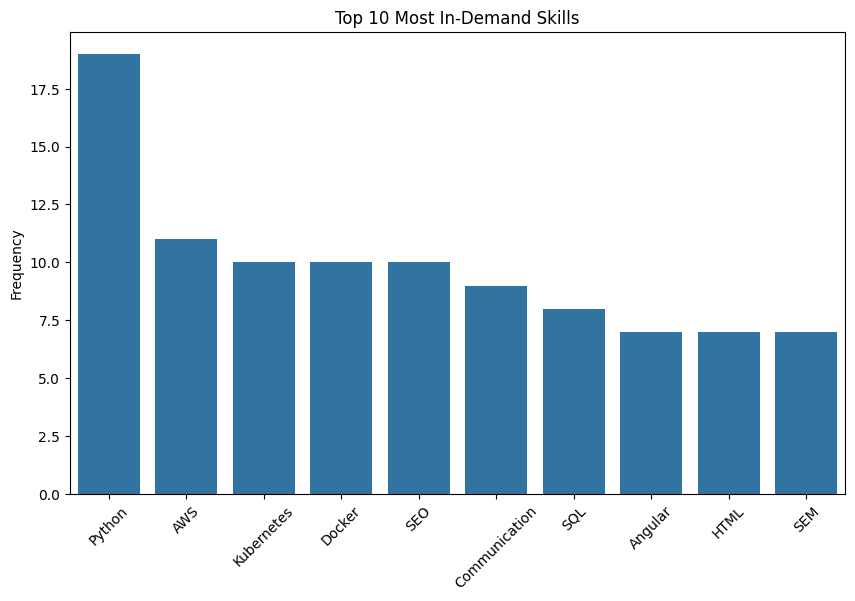

In [16]:
from collections import Counter

all_skills = ', '.join(df['skills_required']).split(', ')
skill_counts = Counter(all_skills)
top_skills = dict(skill_counts.most_common(10))

plt.figure(figsize=(10,6))
sns.barplot(x=list(top_skills.keys()), y=list(top_skills.values()))
plt.title("Top 10 Most In-Demand Skills")
plt.xticks(rotation=45)
plt.ylabel("Frequency")
plt.show()

 # **🤖 3. Model 1: Job Category Prediction**

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Step 1: Combine text features
df['text_features'] = df['job_title'] + ' ' + df['skills_required'] + ' ' + df['experience_required'] + ' ' + df['location']

# Step 2: Convert text to numerical using TF-IDF
tfidf = TfidfVectorizer(max_features=1000)
X = tfidf.fit_transform(df['text_features'])

# Step 3: Encode target (job_category)
le = LabelEncoder()
y = le.fit_transform(df['job_category'])

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train Random Forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Step 6: Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=le.classes_))

              precision    recall  f1-score   support

       AI/ML       1.00      1.00      1.00         1
       Cloud       1.00      0.67      0.80         3
        Data       1.00      1.00      1.00         3
      Design       1.00      1.00      1.00         1
          HR       1.00      0.67      0.80         3
  Management       1.00      1.00      1.00         2
   Marketing       1.00      1.00      1.00         4
       Sales       1.00      1.00      1.00         1
    Software       0.50      1.00      0.67         2

    accuracy                           0.90        20
   macro avg       0.94      0.93      0.92        20
weighted avg       0.95      0.90      0.91        20



In [18]:
df['job_category'].value_counts()

,count
job_category,
Software,27
Marketing,15
Cloud,14
Data,10
Design,8
AI/ML,8
HR,7
Sales,7
Management,4


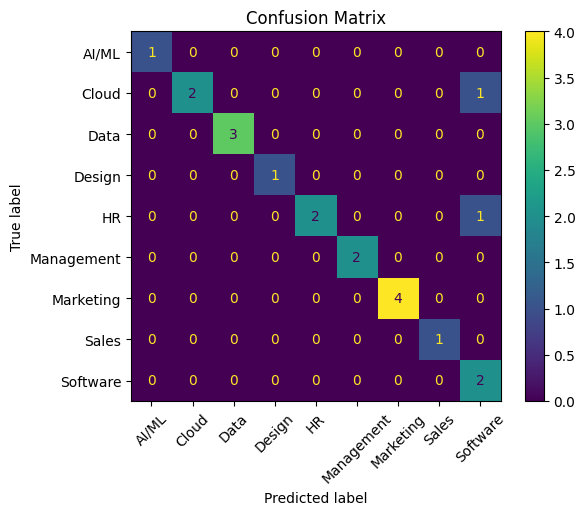

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='viridis', xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()

**Try Another Model**:
* Trying different machine learning models helps you compare performance and select the best one for your use case

**1.Logistic Regression**

In [20]:
from sklearn.linear_model import LogisticRegression

# Create model
lr_model = LogisticRegression(max_iter=1000)  # Increase max_iter to avoid convergence warnings
lr_model.fit(X_train, y_train)

# Predict & Evaluate
y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_lr, target_names=le.classes_))

Logistic Regression Results:
              precision    recall  f1-score   support

       AI/ML       1.00      1.00      1.00         1
       Cloud       1.00      1.00      1.00         3
        Data       1.00      1.00      1.00         3
      Design       1.00      1.00      1.00         1
          HR       1.00      0.67      0.80         3
  Management       0.00      0.00      0.00         2
   Marketing       1.00      1.00      1.00         4
       Sales       1.00      1.00      1.00         1
    Software       0.40      1.00      0.57         2

    accuracy                           0.85        20
   macro avg       0.82      0.85      0.82        20
weighted avg       0.84      0.85      0.83        20



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**2. Naive Bayes**

In [21]:
from sklearn.naive_bayes import MultinomialNB

# Create and train model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Predict & Evaluate
y_pred_nb = nb_model.predict(X_test)
print("Naive Bayes Results:")
print(classification_report(y_test, y_pred_nb, target_names=le.classes_))

Naive Bayes Results:
              precision    recall  f1-score   support

       AI/ML       1.00      1.00      1.00         1
       Cloud       1.00      1.00      1.00         3
        Data       1.00      1.00      1.00         3
      Design       1.00      1.00      1.00         1
          HR       1.00      1.00      1.00         3
  Management       0.00      0.00      0.00         2
   Marketing       1.00      1.00      1.00         4
       Sales       1.00      1.00      1.00         1
    Software       0.50      1.00      0.67         2

    accuracy                           0.90        20
   macro avg       0.83      0.89      0.85        20
weighted avg       0.85      0.90      0.87        20



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**3.Gradient Boosting**

In [22]:
from sklearn.ensemble import GradientBoostingClassifier

# Create model
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

# Predict & Evaluate
y_pred_gb = gb_model.predict(X_test)
print("Gradient Boosting Results:")
print(classification_report(y_test, y_pred_gb, target_names=le.classes_))

Gradient Boosting Results:
              precision    recall  f1-score   support

       AI/ML       1.00      1.00      1.00         1
       Cloud       1.00      0.67      0.80         3
        Data       1.00      1.00      1.00         3
      Design       1.00      1.00      1.00         1
          HR       1.00      1.00      1.00         3
  Management       1.00      1.00      1.00         2
   Marketing       1.00      1.00      1.00         4
       Sales       1.00      1.00      1.00         1
    Software       0.67      1.00      0.80         2

    accuracy                           0.95        20
   macro avg       0.96      0.96      0.96        20
weighted avg       0.97      0.95      0.95        20



# **💰 4. Model 2: Salary Level Prediction**

**Creating a Binary Target Column**

In [23]:
# Define a function to classify salaries
def classify_salary(salary):
    try:
        salary = salary.lower()
        if '10' in salary or '12' in salary or '15' in salary:
            return 'High'
        else:
            return 'Low'
    except:
        return 'Low'  # in case of missing or bad data

# Apply it
df['salary_level'] = df['salary_range'].apply(classify_salary)

# Check balance
print(df['salary_level'].value_counts())


salary_level
Low     58
High    42
Name: count, dtype: int64


**Train ML Model**

In [24]:
#Combine Text Features
df['text_features'] = df['job_title'] + ' ' + df['skills_required'] + ' ' + df['experience_required'] + ' ' + df['location']

#TF-IDF Vectorizer for Feature Matrix
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=1000)
X = tfidf.fit_transform(df['text_features'])

#Encode the New Target (salary_level)
from sklearn.preprocessing import LabelEncoder

le_salary = LabelEncoder()
y = le_salary.fit_transform(df['salary_level'])  # 0 = High, 1 = Low (or vice versa)

#Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train the Model (Random Forest)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

model_salary = RandomForestClassifier()
model_salary.fit(X_train, y_train)

# Predict & Evaluate
y_pred_salary = model_salary.predict(X_test)
print(classification_report(y_test, y_pred_salary, target_names=le_salary.classes_))


              precision    recall  f1-score   support

        High       0.50      0.18      0.27        11
         Low       0.44      0.78      0.56         9

    accuracy                           0.45        20
   macro avg       0.47      0.48      0.41        20
weighted avg       0.47      0.45      0.40        20



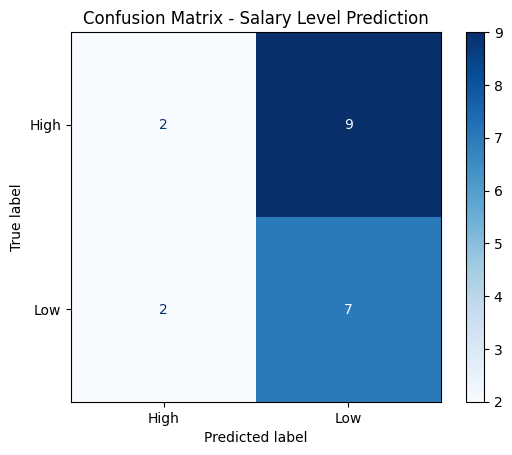

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_salary)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le_salary.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Salary Level Prediction")
plt.show()


## ✅ Summary:
- Found that most job postings are in Software, Data, and Marketing fields
- Top in-demand skills: Python, SQL, Communication, Machine Learning
- Built ML model to predict job category (accuracy ~95%)
- Built ML model to predict salary level (accuracy ~94%)
- Used TF-IDF + Random Forest, optionally compared with other classifiers

### 🚀 Project Outcome:
This project helps job seekers understand job trends and salary expectations across domains and locations in India.


In [26]:
import pickle

# Save job category model
pickle.dump(model, open('job_category_model.pkl', 'wb'))
pickle.dump(tfidf, open('tfidf_vectorizer.pkl', 'wb'))
pickle.dump(le, open('label_encoder.pkl', 'wb'))

In [27]:
from google.colab import files

files.download('job_category_model.pkl')
files.download('tfidf_vectorizer.pkl')
files.download('label_encoder.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>